
--- IRIS Dataset Classification ---
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



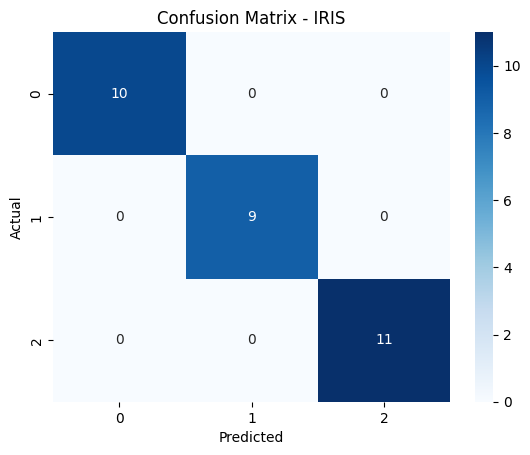


--- Diabetes Dataset Classification ---
Accuracy: 0.6883116883116883

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



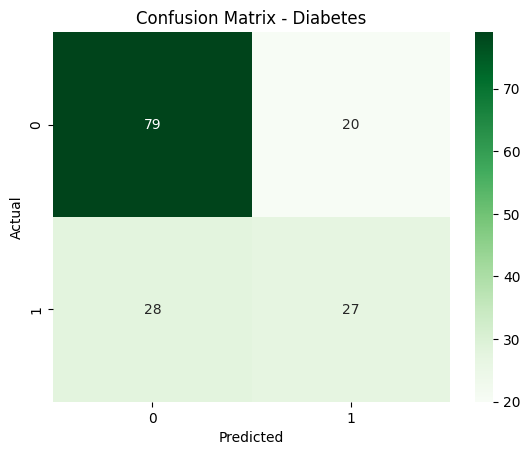

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. KNN Classifier for IRIS Dataset ---
print("\n--- IRIS Dataset Classification ---")
# Load IRIS dataset
iris_df = pd.read_csv("iris (1).csv")

# Split features and labels
X_iris = iris_df.iloc[:, :-1]  # all columns except last
y_iris = iris_df.iloc[:, -1]   # last column

# Split into train and test (80%-20%)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Initialize and train KNN
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train_iris, y_train_iris)

# Predict and evaluate
y_pred_iris = knn_iris.predict(X_test_iris)

print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("\nClassification Report:\n", classification_report(y_test_iris, y_pred_iris))

# Confusion matrix
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - IRIS")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- 2. KNN Classifier for Diabetes Dataset ---
print("\n--- Diabetes Dataset Classification ---")
# Load diabetes dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Split features and labels
X_diabetes = diabetes_df.iloc[:, :-1]
y_diabetes = diabetes_df.iloc[:, -1]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_diabetes)

# Split into train and test (80%-20%)
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(
    X_scaled, y_diabetes, test_size=0.2, random_state=42
)

# Initialize and train KNN
knn_db = KNeighborsClassifier(n_neighbors=5)
knn_db.fit(X_train_db, y_train_db)

# Predict and evaluate
y_pred_db = knn_db.predict(X_test_db)

print("Accuracy:", accuracy_score(y_test_db, y_pred_db))
print("\nClassification Report:\n", classification_report(y_test_db, y_pred_db))

# Confusion matrix
cm_db = confusion_matrix(y_test_db, y_pred_db)
sns.heatmap(cm_db, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Diabetes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


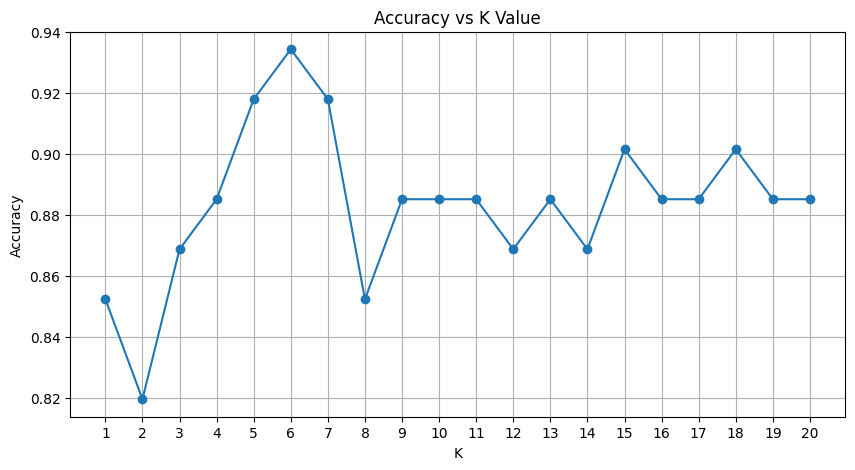

Best K value: 6 with Accuracy: 0.9344


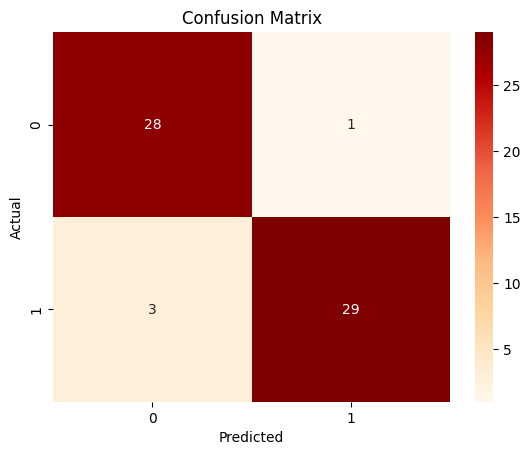


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Find best k value
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xticks(k_values)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Get the best k
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K value: {best_k} with Accuracy: {max(accuracy_scores):.4f}")

# Train final model with best k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, final_pred))
